In [25]:
import pandas as pd
df=pd.read_csv('Preprocessed.csv')
df.head(3)

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month,day
0,-17.0503,-74.0580,30.94,4.6,1,12,183.0,4.973,0.83,3,7640,48327,1180,0,15.2,10.5,0.146,14,1,15,23,2020,12,31
1,-39.3139,-72.0545,107.55,4.8,11,12,52.0,0.389,1.10,3,7638,48324,30040,0,4.0,3.9,0.093,11,1,15,23,2020,12,29
2,-34.3785,-70.8291,92.47,4.6,10,12,44.0,0.211,0.96,3,7637,48323,16958,0,3.5,3.8,0.143,8,1,15,6,2020,12,29


In [26]:
df.shape

(57206, 24)

In [27]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')
X = df.drop("mag", axis=1)
y = df["mag"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [28]:
sc = RobustScaler()

X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt


X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()


def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(15, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Incremental Training for LSTM Model
def train_incremental_lstm_model(base_model, X_train_new, y_train_new, epochs=15, batch_size=28):
    base_model.fit(X_train_new, y_train_new, epochs=epochs, batch_size=batch_size, verbose=1)
    return base_model


# Train Incremental LSTM Model
incremental_lstm_model = create_lstm_model(input_shape=(X_train_array.shape[1], 1))
incremental_lstm_model = train_incremental_lstm_model(incremental_lstm_model, X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1), y_train)






Epoch 1/15
1635/1635 [==============================] - 17s 9ms/step - loss: 0.9173
Epoch 2/15
1635/1635 [==============================] - 16s 10ms/step - loss: 0.2435
Epoch 3/15
1635/1635 [==============================] - 15s 9ms/step - loss: 0.2200
Epoch 4/15
1635/1635 [==============================] - 15s 9ms/step - loss: 0.2104
Epoch 5/15
1635/1635 [==============================] - 16s 10ms/step - loss: 0.2028
Epoch 6/15
1635/1635 [==============================] - 15s 9ms/step - loss: 0.1973
Epoch 7/15
1635/1635 [==============================] - 16s 10ms/step - loss: 0.1932
Epoch 8/15
1635/1635 [==============================] - 15s 9ms/step - loss: 0.1888
Epoch 9/15
1635/1635 [==============================] - 15s 9ms/step - loss: 0.1842
Epoch 10/15
1635/1635 [==============================] - 14s 9ms/step - loss: 0.1810
Epoch 11/15
1635/1635 [==============================] - 14s 9ms/step - loss: 0.1763
Epoch 12/15
1635/1635 [==============================] - 15s 9ms/step -

In [30]:
# Evaluate Incremental LSTM Model
incremental_lstm_mse, incremental_lstm_r2, incremental_lstm_rmse = evaluate_lstm_model(incremental_lstm_model, X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1), y_test)
print("Incremental LSTM Model Mean Squared Error: ", incremental_lstm_mse)
print("Incremental LSTM Model R2 Score: ", incremental_lstm_r2)
print("Incremental LSTM Model Root Mean Squared Error: ", incremental_lstm_rmse)


358/358 [==============================] - 1s 3ms/step
Incremental LSTM Model Mean Squared Error:  0.1597139020901032
Incremental LSTM Model R2 Score:  0.7007482868570554
Incremental LSTM Model Root Mean Squared Error:  0.3996422176023239


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming `y_test_pred_incremental_lstm` is the predicted values from your incremental LSTM model
y_test_pred_incremental_lstm = incremental_lstm_model.predict(X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1))

# Calculate MSE
mse_incremental_lstm = mean_squared_error(y_test, y_test_pred_incremental_lstm)

# Calculate RMSE
rmse_incremental_lstm = np.sqrt(mse_incremental_lstm)

# Calculate MAE
mae_incremental_lstm = mean_absolute_error(y_test, y_test_pred_incremental_lstm)

# Calculate R2 Score
r2_incremental_lstm = r2_score(y_test, y_test_pred_incremental_lstm)

# Print all metrics
print("Incremental LSTM Model Mean Squared Error (MSE):", mse_incremental_lstm)
print("Incremental LSTM Model Root Mean Squared Error (RMSE):", rmse_incremental_lstm)
print("Incremental LSTM Model Mean Absolute Error (MAE):", mae_incremental_lstm)
print("Incremental LSTM Model R2 Score:", r2_incremental_lstm)


358/358 [==============================] - 1s 3ms/step
Incremental LSTM Model Mean Squared Error (MSE): 0.1597139020901032
Incremental LSTM Model Root Mean Squared Error (RMSE): 0.3996422176023239
Incremental LSTM Model Mean Absolute Error (MAE): 0.29892601404671815
Incremental LSTM Model R2 Score: 0.7007482868570554


In [32]:
import pandas as pd

# Assuming `y_test_pred_incremental_lstm` is the predicted values from your incremental LSTM model
# and `y_test` are the actual values
predicted_actual_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_incremental_lstm.flatten()})

# Define the file path where you want to save the Excel file
excel_file_path = "predicted_vs_actual.xlsx"

# Export DataFrame to Excel
predicted_actual_df.to_excel(excel_file_path, index=False)

print("Excel file saved successfully.")


Excel file saved successfully.


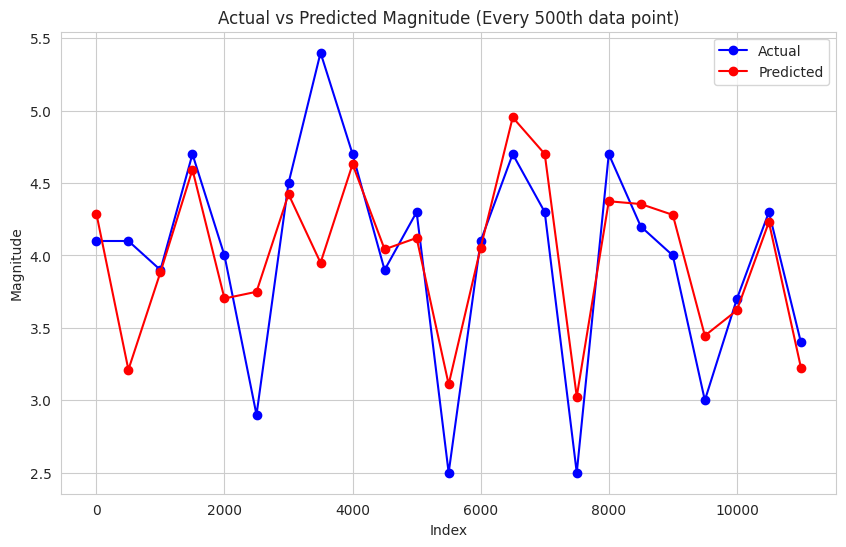

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
predictions = pd.read_excel('predicted_vs_actual.xlsx')

# Plotting every nth data point
n = 500 # Change this value as needed
plt.figure(figsize=(10, 6))
plt.plot(predictions.index[::n], predictions['Actual'][::n], marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(predictions.index[::n], predictions['Predicted'][::n], marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Actual vs Predicted Magnitude (Every {}th data point)'.format(n))
plt.legend()
plt.grid(True)
plt.show()
